# Day One: Sample data acquisition skill

I'm teaching this class from the fundamentals upwards, which means that we study data formats and how the Internet works so that we can properly learn to scrape data from the web and use web APIs.   A problem with that approach is that it leaves some of the really cool stuff towards the end of the class. To mitigate this, I like to motivate the work you will do over the next few weeks by providing a simple example of how easy it is to go collected data from a cooperative website.  Most websites are uncooperative and so we have to learn to deal with those, which we will do during the class.  For now, let's figure out how to scrape some [data on the coronavirus from Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory).

I'd like everyone to read through this notebook and manually type all the code into your own notebook. This will give you some idea of where we are going and how straightforward it is in many cases.

## Inspect the first table element

Using Chrome, go to URL:

[https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory)

and then right-click on the start of the table in the right gutter of the Wikipedia page and select <b>Inspect</b> from the drop-down menu. It should something that looks like this:

<img src="figures/covid-inspect.png" width="70%">

That shows you the raw HTML and what it corresponds to visually.  The next step is to use a program to extract that HTML.

## Get the raw HTML from the website

In [1]:
!pip install -q -U requests              # we need these libraries
!pip install -q -U beautifulsoup4

In [2]:
import requests

CovidURL = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
response = requests.get(CovidURL)
print(response.text[0:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"adf92791-a6e2-4ae5-9398-b340ed9d0742","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"COVID-19_pandemic_by_country_and_territory","wgTitle":"COVID-19 pandemic by country and territory","wgCurRevisionId":1039966951,"wgRevisionId":1039966951,"wgArticleId":62938755,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from December 2020","All artic

## Get specific tag using BeautifulSoup

Now let's treat the text as HTML not just English text.  Then we can ask for a specific tag such as the title:

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, "html.parser")
title = soup.find('title')
print("TITLE", title)

TITLE <title>COVID-19 pandemic by country and territory - Wikipedia</title>


##  Get all text elements from all HTML tags

We can also ask for all of the text elements not inside HTML tags:

In [4]:
print(soup.text[0:500].replace('\n', ' '))

    COVID-19 pandemic by country and territory - Wikipedia                                  COVID-19 pandemic by country and territory  From Wikipedia, the free encyclopedia    Jump to navigation Jump to search Data and maps, showing cases and deaths   COVID-19 pandemicConfirmed deaths per 100,000 population, as of 15 August 2021   555+  100–555  18–100  3.3–18  0.6–3.3  0.1–0.6  <0.1  No deaths or no dataDiseaseCOVID-19Virus strainSARS-CoV-2SourceProbably bats, possibly via pangolins[1][2]Locat


## Find all tables

BeautifulSoup has a mechanism to find all of the tables (HTML `table` text) in an HTML document:

In [5]:
tables = soup.findAll('table')

The first table looks like this on the page:
 
<img src="figures/covid-table-0.png" width="30%">

and we can get the HTML representing each table:

In [6]:
t = str(tables[0])
print(t[0:1000])

<table class="infobox"><tbody><tr><th class="infobox-above" colspan="2" style="background:#FFCCCB">COVID-19 pandemic</th></tr><tr><td class="infobox-image" colspan="2" style="border-bottom:#aaa 1px solid;"><a class="image" href="/wiki/File:COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg"><img alt="COVID-19 Outbreak World Map Total Deaths per Capita.svg" data-file-height="1398" data-file-width="2754" decoding="async" height="168" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/330px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/495px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/660px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png 2x" width="330"/>

That is raw HTML representing the table, but we can use a Jupyter notebook trick to display that text as HTML:

In [7]:
from IPython.display import HTML # IPython is the underlying Python interpreter used by this notebook
HTML(t)                          # Render the text in t as HTML

## Using Pandas to read a URL to extract tables

Pandas has a built-in mechanism to read a URL and extract all the table tags into dataframes. Extremely handy.

In [8]:
import pandas as pd

tables = pd.read_html(CovidURL)

### Summary table

The first table again looks like this on the page:
 
<img src="figures/covid-table-0.png" width="30%">

And pandas can pull that into a data frame:

In [9]:
tables[0]

,COVID-19 pandemic,COVID-19 pandemic.1
0,"Confirmed deaths per 100,000 population, as of...","Confirmed deaths per 100,000 population, as of..."
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[1][2]"
4,Location,Worldwide
5,First outbreak,China[3]
6,Index case,"Wuhan, Hubei, China.mw-parser-output .geo-defa..."
7,Date,"1 December 2019[3] – present(1 year, 8 months,..."
8,Confirmed cases,"212,128,476[4]"
9,Deaths,"4,435,812[4]"


### Death rate table

The death rate per country table is `table[9]` (found by trial-and-error) and looks like:

<img src="figures/covid-table-1.png" width="40%">

and we get a nice data frame from it too:

In [10]:
df_deaths = tables[9]
df_deaths.head(10)

,Country,Confirmed cases,Deaths,Case fatality rate,"Deaths per 100,000 population"
0,Peru,2141235,197818,9.2%,608.48
1,Hungary,810781,30046,3.7%,307.53
2,Bosnia and Herzegovina,209073,9722,4.7%,294.52
3,Czech Republic,1677512,30385,1.8%,284.78
4,Brazil,20570891,574527,2.8%,272.22
5,North Macedonia,168872,5668,3.4%,272.05
6,Montenegro,109962,1671,1.5%,268.59
7,San Marino,5231,90,1.7%,265.80
8,Bulgaria,441295,18475,4.2%,264.85
9,Colombia,4889537,124216,2.5%,246.76


As with any data frame, we can sort values and select columns of interest:

In [11]:
df_death_rate = df_deaths[['Country','Deaths per 100,000 population']].sort_values('Deaths per 100,000 population', ascending=False)
df_death_rate.head(10)

,Country,"Deaths per 100,000 population"
0,Peru,608.48
1,Hungary,307.53
2,Bosnia and Herzegovina,294.52
3,Czech Republic,284.78
4,Brazil,272.22
5,North Macedonia,272.05
6,Montenegro,268.59
7,San Marino,265.80
8,Bulgaria,264.85
9,Colombia,246.76


Once we have a nice data structure like a data frame, it's very easy to build a plot, which is sometimes more satisfying than what we see in some report where we got the data.

In [12]:
df = df_deaths.sort_values('Deaths', ascending=False)
df = df.head(30)
countries = df['Country']
deaths = df['Deaths']

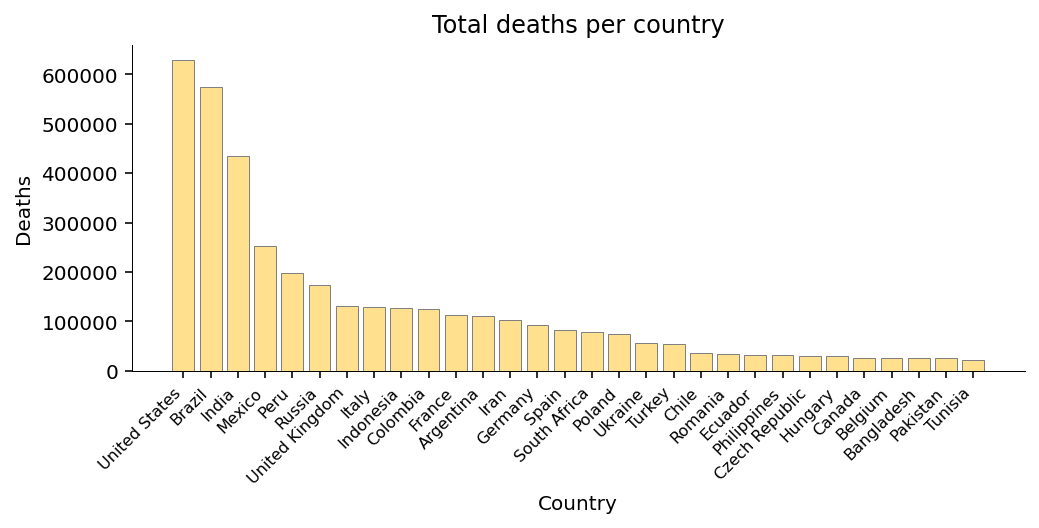

In [13]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(1, 1, figsize=(8,3))
barcontainers = ax.bar(countries,deaths, color='#FEE08F')
for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

ax.set_xticks(countries)
ax.set_xticklabels(countries, rotation=45, fontsize=8, horizontalalignment="right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_title("Total deaths per country")
ax.set_ylabel("Deaths")
ax.set_xlabel("Country")

plt.show()

Ok, well hopefully that was fun and gives you some idea of what we can do with just a few simple skills.